In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [55]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [56]:
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [57]:
df = data.copy()

from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

df['Extracurricular Activities'] = lab_enc.fit_transform(df['Extracurricular Activities'])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


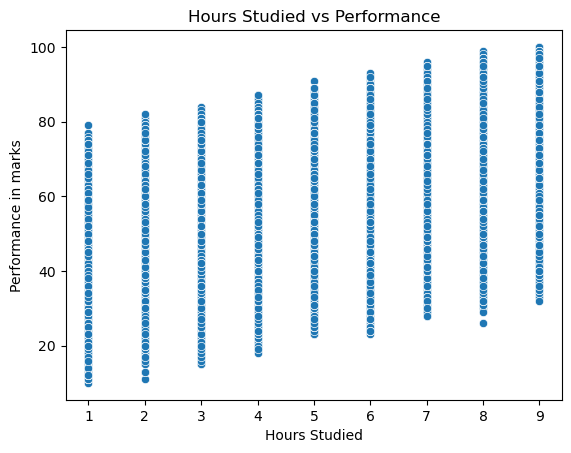

In [58]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

sns.scatterplot(data=df, x='Hours Studied', y='Performance Index')
plt.title('Hours Studied vs Performance')
plt.xlabel('Hours Studied')
plt.ylabel('Performance in marks')
plt.show()

In [59]:
correlation = df['Hours Studied'].corr(df['Performance Index'])
correlation

0.3737303506987239

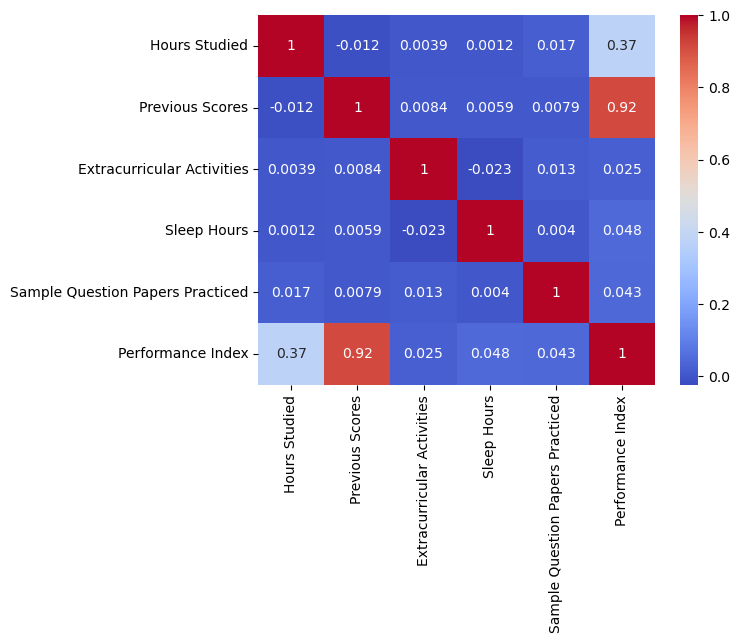

In [60]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.32, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [62]:
y_pred = model.predict(x_test)
y_pred

array([54.75289989, 22.6113112 , 47.92725953, ..., 40.71754565,
       26.80322788, 76.72106893])

In [63]:
act_and_pred = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred})
act_and_pred

,Actual value,Predicted value
0,51.0,54.752900
1,20.0,22.611311
2,46.0,47.927260
3,28.0,31.334686
4,41.0,43.044953
...,...,...
3195,70.0,67.888782
3196,80.0,80.657785
3197,40.0,40.717546
3198,25.0,26.803228


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [65]:
r2

0.9889912982098436